In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

#### Data effect

In [2]:
# Load data dir
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
# Save data dir
dir_save = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/newdata4/'

# dataframe containing VTAs for prediction
data_HDP_VTAmasive = pd.read_csv(dir + 'data_HDP_VTAmassive.csv')
data_CST_VTAmasive  = pd.read_csv(dir + 'data_CST_VTAmassive.csv')

# dataframe containing clinical mA
clinical_mA_ef = pd.read_csv(dir + 'clinical_mA_effect.csv')
clinical_mA_sef = pd.read_csv(dir + 'clinical_mA_side_effect_capsular.csv')

#total sum weights
sum_w_CST = pd.read_csv(dir + 'df_total_sum_w_CST_3.csv')
sum_w_HDP = pd.read_csv(dir + 'df_total_sum_w_HDP.csv')

In [3]:
# Remove 'non tested contacts' (0 mA) & 'non effect contacts' (8 mA)
clinical_mA_HDP = clinical_mA_ef[(clinical_mA_ef['mA'] > 0) & (clinical_mA_ef['mA'] < 8)]
clinical_mA_CST = clinical_mA_sef[(clinical_mA_sef['mA_capsular'] > 0) & (clinical_mA_sef['mA_capsular'] < 8)]

# Remove only non tested contacts --> data saved in /newdata2
#clinical_mA_HDP = clinical_mA_ef[(clinical_mA_ef['mA'] > 0)]
#clinical_mA_CST = clinical_mA_sef[(clinical_mA_sef['mA_capsular'] > 0)]
clinical_mA_CST.drop('mA_capsular', axis=1, inplace=True)

/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
# Rename columns clinic
clinical_mA_HDP.rename(columns = {'mA':'mA_clin'}, inplace = True)
clinical_mA_CST.rename(columns = {'mA':'mA_clin'}, inplace = True)

# Filter data to keep only tested contacts
data_HDP = pd.merge(data_HDP_VTAmasive, clinical_mA_HDP, how="inner", on=['LeadID', 'ContactID'])
data_CST = pd.merge(data_CST_VTAmasive, clinical_mA_CST, how="inner", on=['LeadID', 'ContactID'])

/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
# Add outcome column based on conditions
def conditions(s):
    if (s['mA'] < s['mA_clin']):
        return 0
    elif (s['mA'] == s['mA_clin']):
        return 1
    else:
        return 2

In [6]:
# Add outcome column based on conditions
def conditions(s):
    if (s['mA'] < s['mA_clin']):
        return 0
    else:
        return 1

In [7]:
data_HDP['outcome'] = data_HDP.apply(conditions, axis=1)
data_CST['outcome'] = data_CST.apply(conditions, axis=1)

In [8]:
# Add pathway columns
data_HDP['pathway'] = 'HDP'
data_CST['pathway'] = 'CST'

use all VTAs (tested contacts in massive) for effect/no effect instead of selecting only a pair per contact
data saved in newdata4

#### Merge data and save

In [9]:
data_HDP.to_csv(dir_save + 'data_HDP.csv', index=False)
data_CST.to_csv(dir_save + 'data_CST.csv', index=False)

## Plot logreg

In [11]:
df_HDP_0 = data_HDP
df_CST_0 = data_CST

/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


<Figure size 241.2x241.2 with 0 Axes>

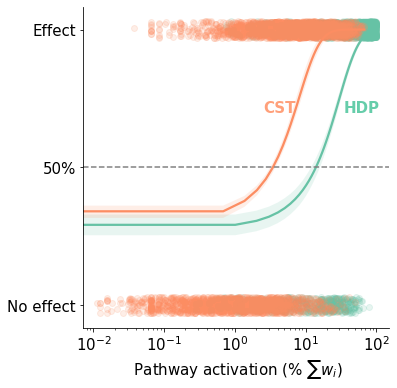

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([df_HDP_0, df_CST_0], axis=0)

plt.figure(figsize=(3.35,3.35))
#plt.style.use('default')
# Plot log reg curves for all data (clinical VTAs)
sns.lmplot(x="percent_w", y="outcome", hue="pathway", data=df,
           logistic=True, y_jitter=.03, palette="Set2", legend=False, scatter_kws={'alpha':0.15} )
plt.xscale('log')
plt.axhline(y=0.5, color='grey', linestyle='--')
#plt.axvline(x=60, color='grey', linestyle='--')
#plt.axvline(x=100, color='grey', linestyle='--')
#plt.axvline(x=1.1, color='grey', linestyle='--')
#plt.axvline(x=4.5, color='grey', linestyle='--')

#plt.title('Activation thresholds')
plt.xlabel ( r' Pathway activation (% $\sum w_i$)' , fontsize=15)
#plt.xlabel ( r' Pathway activation (fbc)' , fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([0, 150])
#plt.ylabel ('Outcome')
plt.ylabel('')
ys=[0,0.5, 1]
labels=['No effect','50%', 'Effect']
plt.yticks(ys, labels, fontsize=15)

plt.text(34,0.7, 'HDP',{'color':'mediumaquamarine','weight':'heavy','size':15})
plt.text(2.5,0.7, 'CST',{'color':'lightsalmon','weight':'heavy','size':15})

#plt.text(0.0003,0.7, 'HDP',{'color':'mediumaquamarine','weight':'heavy','size':15})
#plt.text(0.0043,0.7, 'CST',{'color':'lightsalmon','weight':'heavy','size':15})

#plt.legend(title='Pathway', labels=['HDP', 'CST'], bbox_to_anchor=(0.82, 0.65), loc='upper left', borderaxespad=0)
#plt.legend(title='Pathway', loc='center right', labels=['HDP', 'CST'])

#plt.savefig('/mnt/data/2020_Projects/2021_HDP/03_Data/Plots/logreg_pathways_man.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
df_CST_0.groupby(['outcome'], as_index=False).percent_w.mean()

outcome  percent_w
0        0   2.384868
1        1  11.264956

In [14]:
df_HDP_0.loc[df_HDP_0['outcome'] == 1].percent_w.max()

100.0